<a href="https://colab.research.google.com/github/Suhaila-Hassan/Walmart-Sales-Analysis-and-Forecasting/blob/main/Research_and_Training_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [ ]:
!pip install neuralforecast

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.0/261.0 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 285.8/285.8 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 825.4/825.4 kB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.9/68.9 MB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 35.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 29.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import calendar
np.random.seed(42)

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, GRU, Conv1D, MaxPooling1D, Flatten, SimpleRNN, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

from prophet import Prophet

from neuralforecast.models import NBEATSx
from neuralforecast import NeuralForecast
from neuralforecast.losses.pytorch import MSE

import joblib
import pickle

import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dataset.csv to dataset.csv


In [ ]:
df = pd.read_csv('dataset.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.head()

,Date,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
0,2010-02-05,0,1.0,24924.50,42.31,2.572,211.096358,8.106
1,2010-02-05,0,26.0,11737.12,42.31,2.572,211.096358,8.106
2,2010-02-05,0,17.0,13223.76,42.31,2.572,211.096358,8.106
3,2010-02-05,0,45.0,37.44,42.31,2.572,211.096358,8.106
4,2010-02-05,0,28.0,1085.29,42.31,2.572,211.096358,8.106


# Dataset Preparation

In [ ]:
# Set Date as Index
df = df.sort_values(by='Date', ascending=True).set_index('Date')
df.index = pd.to_datetime(df.index, format='%Y-%m-%d')

In [ ]:
# Extract Department 23
df = df[df['Dept'] == 23]
df.drop(columns=['Dept'], inplace=True)

In [ ]:
df.head()

,IsHoliday,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,
2010-02-05,0,24146.49,42.31,2.572,211.096358,8.106
2010-02-12,1,22812.41,38.51,2.548,211.242170,8.106
2010-02-19,0,21381.85,39.93,2.514,211.289143,8.106
2010-02-26,0,17798.37,46.63,2.561,211.319643,8.106
2010-03-05,0,18993.69,46.50,2.625,211.350143,8.106


# Dataset Information

In [ ]:
df.shape

(143, 6)

In [ ]:
df.shape[0] / 13

11.0

In [ ]:
df.columns

Index(['IsHoliday', 'Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI',
       'Unemployment'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 143 entries, 2010-02-05 to 2012-10-26
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   IsHoliday     143 non-null    int64  
 1   Weekly_Sales  143 non-null    float64
 2   Temperature   143 non-null    float64
 3   Fuel_Price    143 non-null    float64
 4   CPI           143 non-null    float64
 5   Unemployment  143 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 7.8 KB


In [ ]:
df.describe()

,IsHoliday,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.069930,21623.184685,68.306783,3.219699,215.996892,7.610420
std,0.255926,5973.220675,14.250486,0.427313,4.350890,0.383749
min,0.000000,13053.740000,35.400000,2.514000,210.337426,6.573000
25%,0.000000,18417.945000,58.265000,2.764500,211.549277,7.348000
50%,0.000000,20704.870000,69.640000,3.290000,215.459905,7.787000
75%,0.000000,23246.990000,80.485000,3.594000,220.531330,7.838000
max,1.000000,62381.000000,91.650000,3.907000,223.444251,8.106000


In [ ]:
df.isna().sum()

,0
IsHoliday,0
Weekly_Sales,0
Temperature,0
Fuel_Price,0
CPI,0
Unemployment,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
print(f'Date Range: from {df.index.min()} to {df.index.max()}')

Date Range: from 2010-02-05 00:00:00 to 2012-10-26 00:00:00


# Exploratory Data Analysis

In [ ]:
max_idx = df['Weekly_Sales'].idxmax()
min_idx = df['Weekly_Sales'].idxmin()
max_val = df.loc[max_idx, 'Weekly_Sales']
min_val = df.loc[min_idx, 'Weekly_Sales']
print(f'Max Sales: {max_val:,.0f} on {max_idx}')
print(f'Min Sales: {min_val:,.0f} on {min_idx}')

Max Sales: 62,381 on 2010-12-24 00:00:00
Min Sales: 13,054 on 2011-09-16 00:00:00


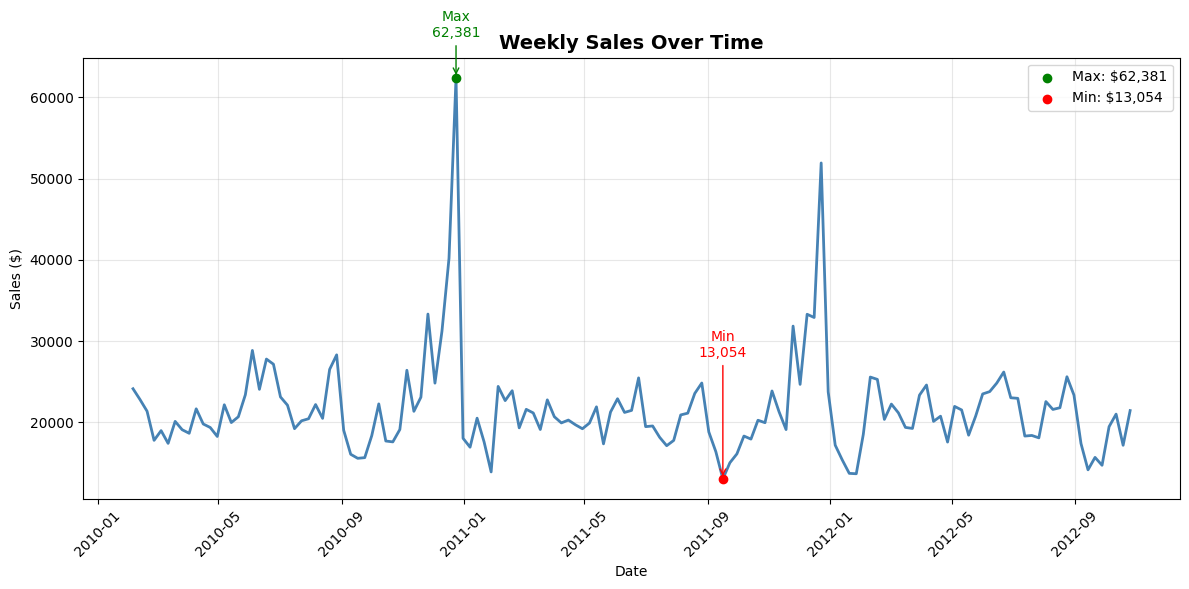

In [ ]:
# Time Series Plot
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Weekly_Sales'], color='steelblue', linewidth=2)

plt.scatter([max_idx], [max_val], color='green', label=f'Max: ${max_val:,.0f}', zorder=5)
plt.scatter([min_idx], [min_val], color='red', label=f'Min: ${min_val:,.0f}', zorder=5)

plt.annotate(f'Max\n{max_val:,.0f}', xy=(max_idx, max_val), xytext=(max_idx, max_val + 5000),
             arrowprops=dict(arrowstyle='->', color='green'), fontsize=10, color='green', ha='center')

plt.annotate(f'Min\n{min_val:,.0f}', xy=(min_idx, min_val), xytext=(min_idx, min_val + 15000),
             arrowprops=dict(arrowstyle='->', color='red'), fontsize=10, color='red', ha='center')

plt.title('Weekly Sales Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Sales ($)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

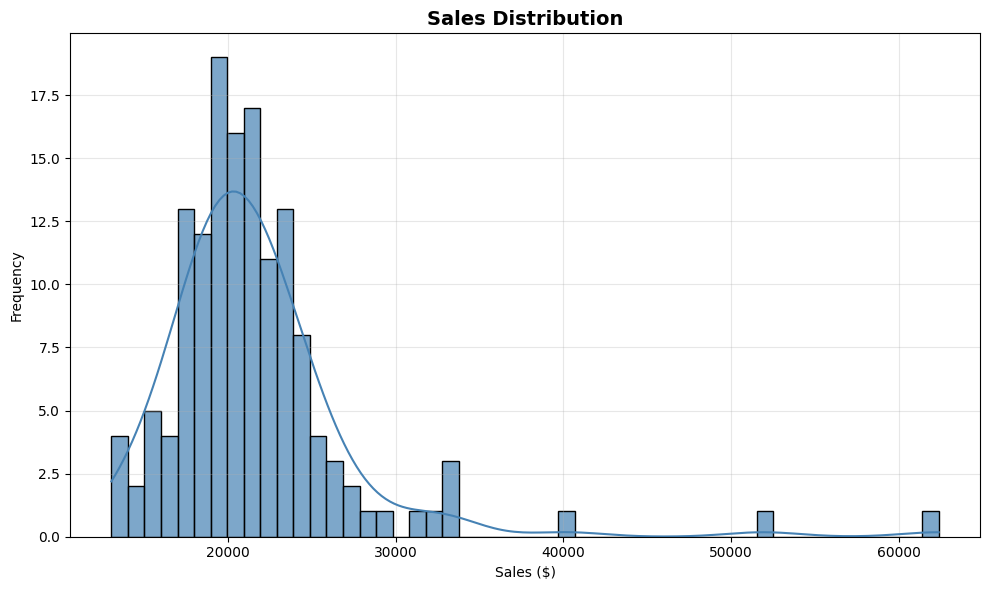

In [ ]:
# Sales Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Weekly_Sales'], bins=50, kde=True, color='steelblue', edgecolor='black', alpha=0.7)
plt.title('Sales Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Sales ($)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

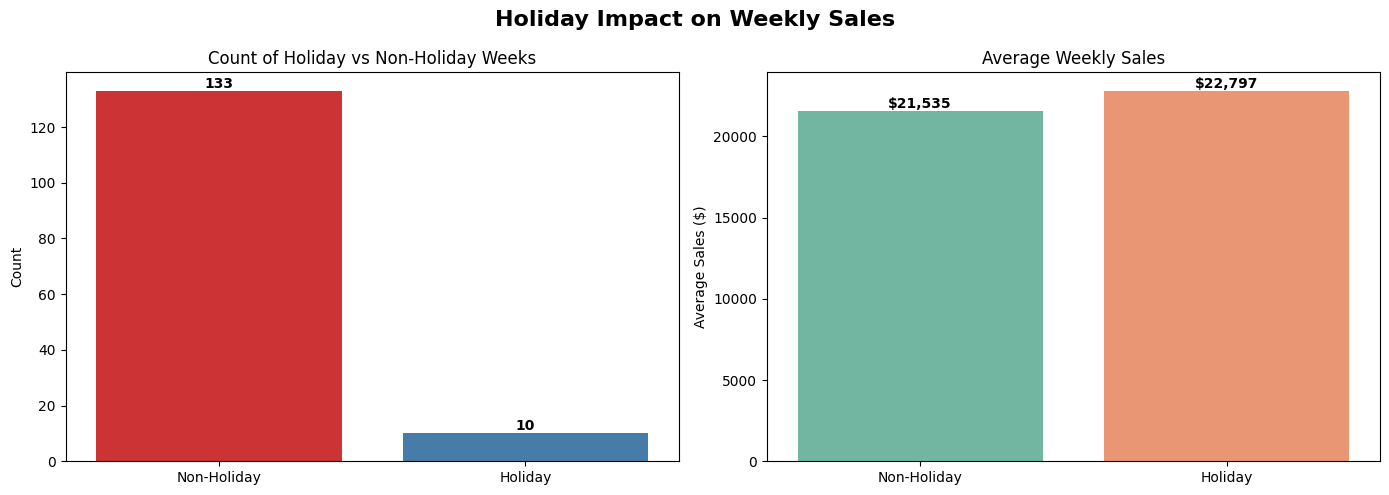

In [ ]:
# Holiday Effect
holiday_counts = df['IsHoliday'].value_counts().rename({0: 'Non-Holiday', 1: 'Holiday'})
holiday_avg_sales = df.groupby('IsHoliday')['Weekly_Sales'].mean().rename({0: 'Non-Holiday', 1: 'Holiday'})

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle('Holiday Impact on Weekly Sales', fontsize=16, fontweight='bold')

sns.barplot(x=holiday_counts.index, y=holiday_counts.values, palette='Set1', ax=axes[0])
axes[0].set_title('Count of Holiday vs Non-Holiday Weeks')
axes[0].set_ylabel('Count')
axes[0].set_xlabel('')
for i, val in enumerate(holiday_counts.values):
    axes[0].text(i, val, f'{val}', ha='center', va='bottom', fontweight='bold')

sns.barplot(x=holiday_avg_sales.index, y=holiday_avg_sales.values, palette='Set2', ax=axes[1])
axes[1].set_title('Average Weekly Sales')
axes[1].set_ylabel('Average Sales ($)')
axes[1].set_xlabel('')
for i, val in enumerate(holiday_avg_sales.values):
    axes[1].text(i, val, f'${val:,.0f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

In [ ]:
monthly_sales = df.groupby(df.index.month)['Weekly_Sales'].mean()
monthly_sales.index = [calendar.month_abbr[m] for m in monthly_sales.index]
max_month = monthly_sales.idxmax()
min_month = monthly_sales.idxmin()
max_value = monthly_sales[max_month]
min_value = monthly_sales[min_month]
print(f'Max Sales: {max_value:,.0f} in {max_month}')
print(f'Min Sales: {min_value:,.0f} in {min_month}')

Max Sales: 34,327 in Dec
Min Sales: 15,990 in Sep


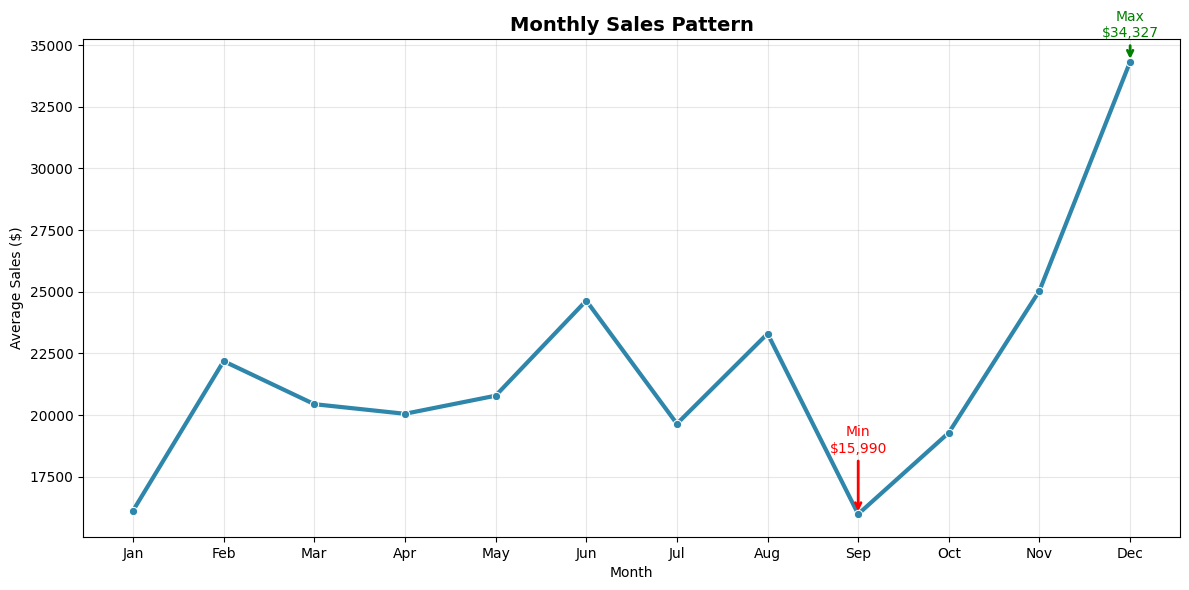

In [ ]:
# Monthly Pattern
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o', linewidth=3, color='#2E86AB')

plt.annotate(f'Max\n${max_value:,.0f}',
             xy=(max_month, max_value),
             xytext=(max_month, max_value + 1000),
             textcoords='data',
             arrowprops=dict(arrowstyle='->', color='green', lw=2),
             ha='center', fontsize=10, color='green')

plt.annotate(f'Min\n${min_value:,.0f}',
             xy=(min_month, min_value),
             xytext=(min_month, min_value + 2500),
             textcoords='data',
             arrowprops=dict(arrowstyle='->', color='red', lw=2),
             ha='center', fontsize=10, color='red')

plt.title('Monthly Sales Pattern', fontsize=14, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Average Sales ($)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

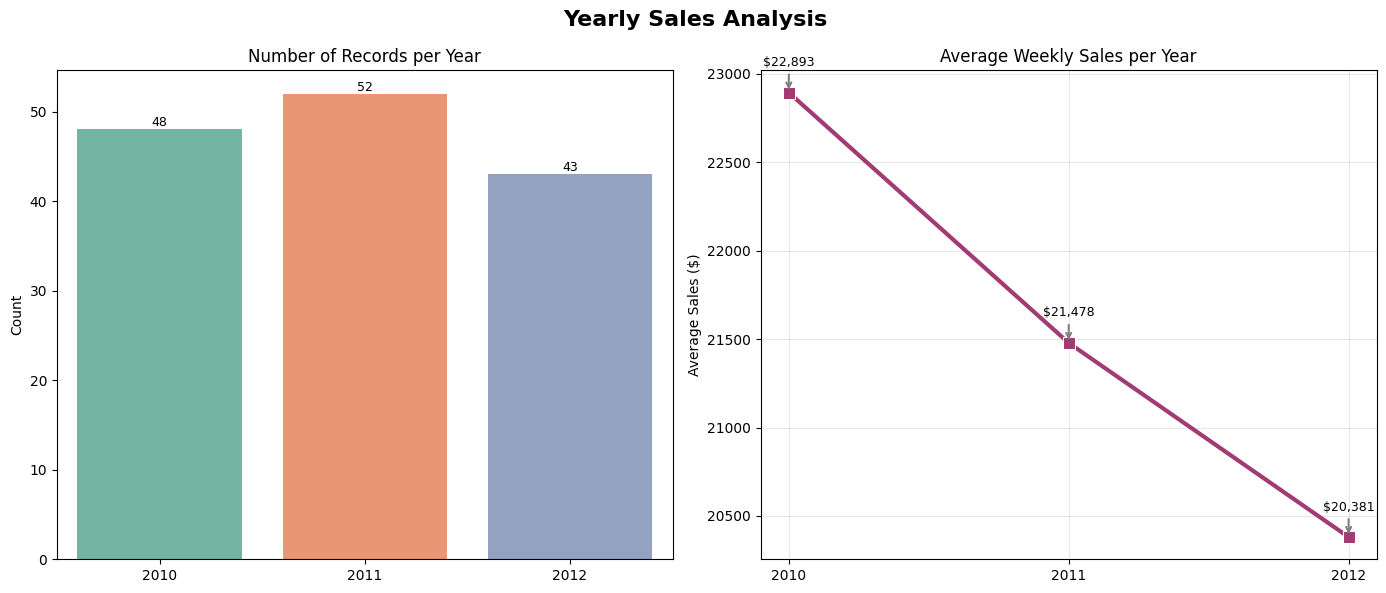

In [ ]:
# Yearly Trend
years = df.index.year
yearly_sales = df.groupby(years)['Weekly_Sales'].mean()

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Yearly Sales Analysis', fontsize=16, fontweight='bold')

countplot = sns.countplot(x=years, palette='Set2', ax=axes[0])
axes[0].set_title('Number of Records per Year')
axes[0].set_ylabel('Count')
axes[0].set_xlabel('')

for bar in countplot.patches:
    height = bar.get_height()
    countplot.text(bar.get_x() + bar.get_width() / 2, height,
                   f'{int(height)}', ha='center', va='bottom', fontsize=9)

lineplot = sns.lineplot(x=yearly_sales.index, y=yearly_sales.values,
                        marker='s', linewidth=3, markersize=8,
                        color='#A23B72', ax=axes[1])
axes[1].set_title('Average Weekly Sales per Year')
axes[1].set_ylabel('Average Sales ($)')
axes[1].set_xlabel('')
axes[1].set_xticks(yearly_sales.index)
axes[1].grid(True, alpha=0.3)

for year, sales in yearly_sales.items():
    lineplot.annotate(f'${sales:,.0f}', xy=(year, sales), xytext=(year, sales + 150),
                      ha='center', fontsize=9, color='black',
                      arrowprops=dict(arrowstyle='->', color='gray', lw=1.5))

plt.tight_layout()
plt.show()

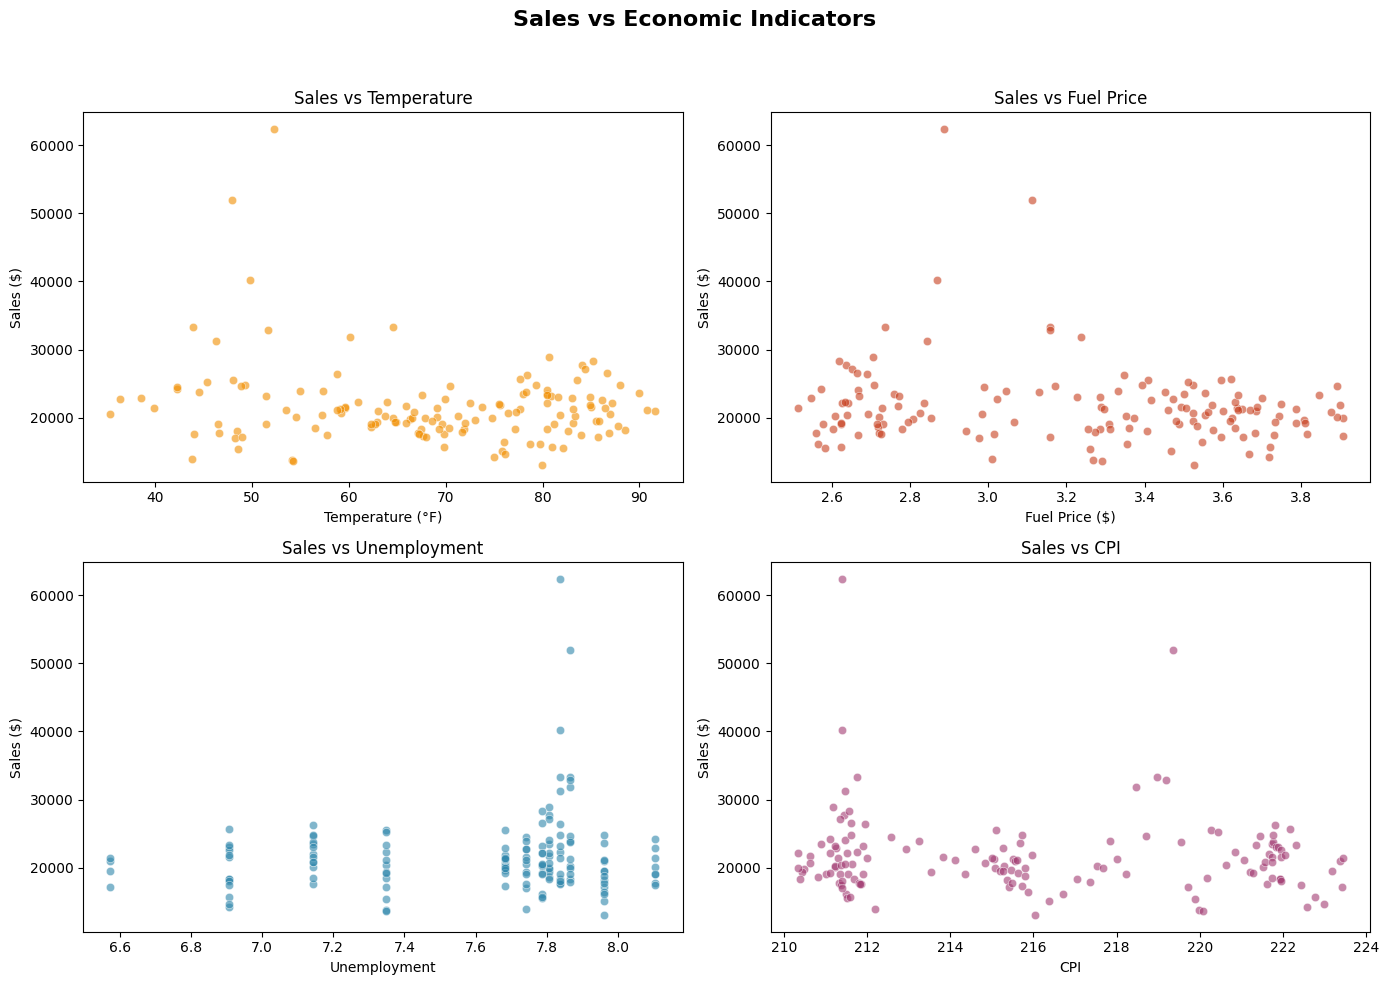

In [ ]:
# Sales vs Economic Indicators
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Sales vs Economic Indicators', fontsize=16, fontweight='bold')
colors = ['#F18F01', '#C73E1D', '#2E86AB', '#A23B72']

sns.scatterplot(x='Temperature', y='Weekly_Sales', data=df,
                color=colors[0], alpha=0.6, ax=axes[0, 0])
axes[0, 0].set_title('Sales vs Temperature')
axes[0, 0].set_xlabel('Temperature (°F)')
axes[0, 0].set_ylabel('Sales ($)')

sns.scatterplot(x='Fuel_Price', y='Weekly_Sales', data=df,
                color=colors[1], alpha=0.6, ax=axes[0, 1])
axes[0, 1].set_title('Sales vs Fuel Price')
axes[0, 1].set_xlabel('Fuel Price ($)')
axes[0, 1].set_ylabel('Sales ($)')

sns.scatterplot(x='Unemployment', y='Weekly_Sales', data=df,
                color=colors[2], alpha=0.6, ax=axes[1, 0])
axes[1, 0].set_title('Sales vs Unemployment')
axes[1, 0].set_xlabel('Unemployment')
axes[1, 0].set_ylabel('Sales ($)')

sns.scatterplot(x='CPI', y='Weekly_Sales', data=df,
                color=colors[3], alpha=0.6, ax=axes[1, 1])
axes[1, 1].set_title('Sales vs CPI')
axes[1, 1].set_xlabel('CPI')
axes[1, 1].set_ylabel('Sales ($)')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

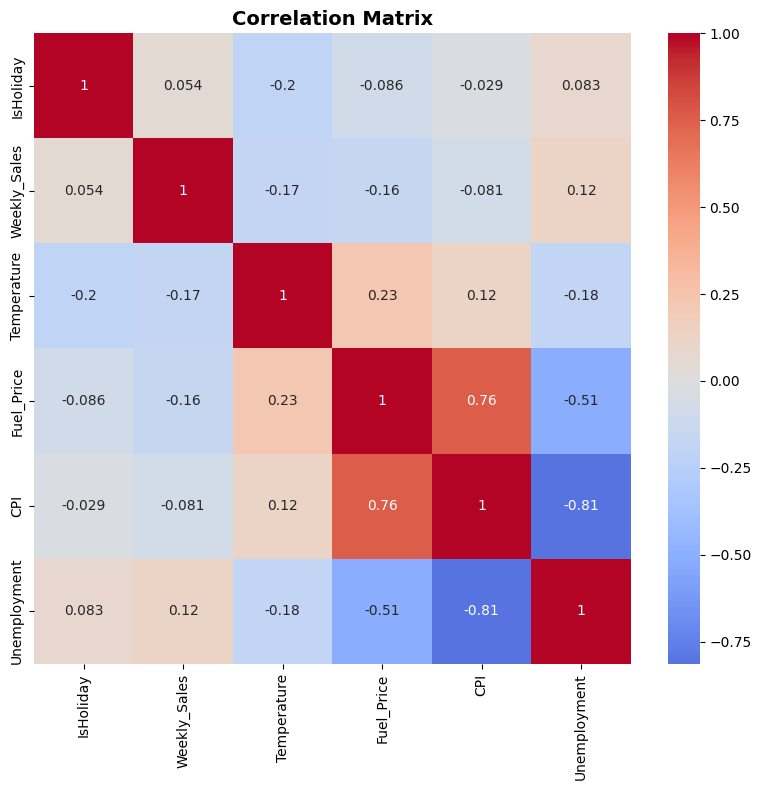

In [ ]:
# Correlation Matrix
plt.figure(figsize=(8, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Time Series Analysis

## Seasonal Decomposition

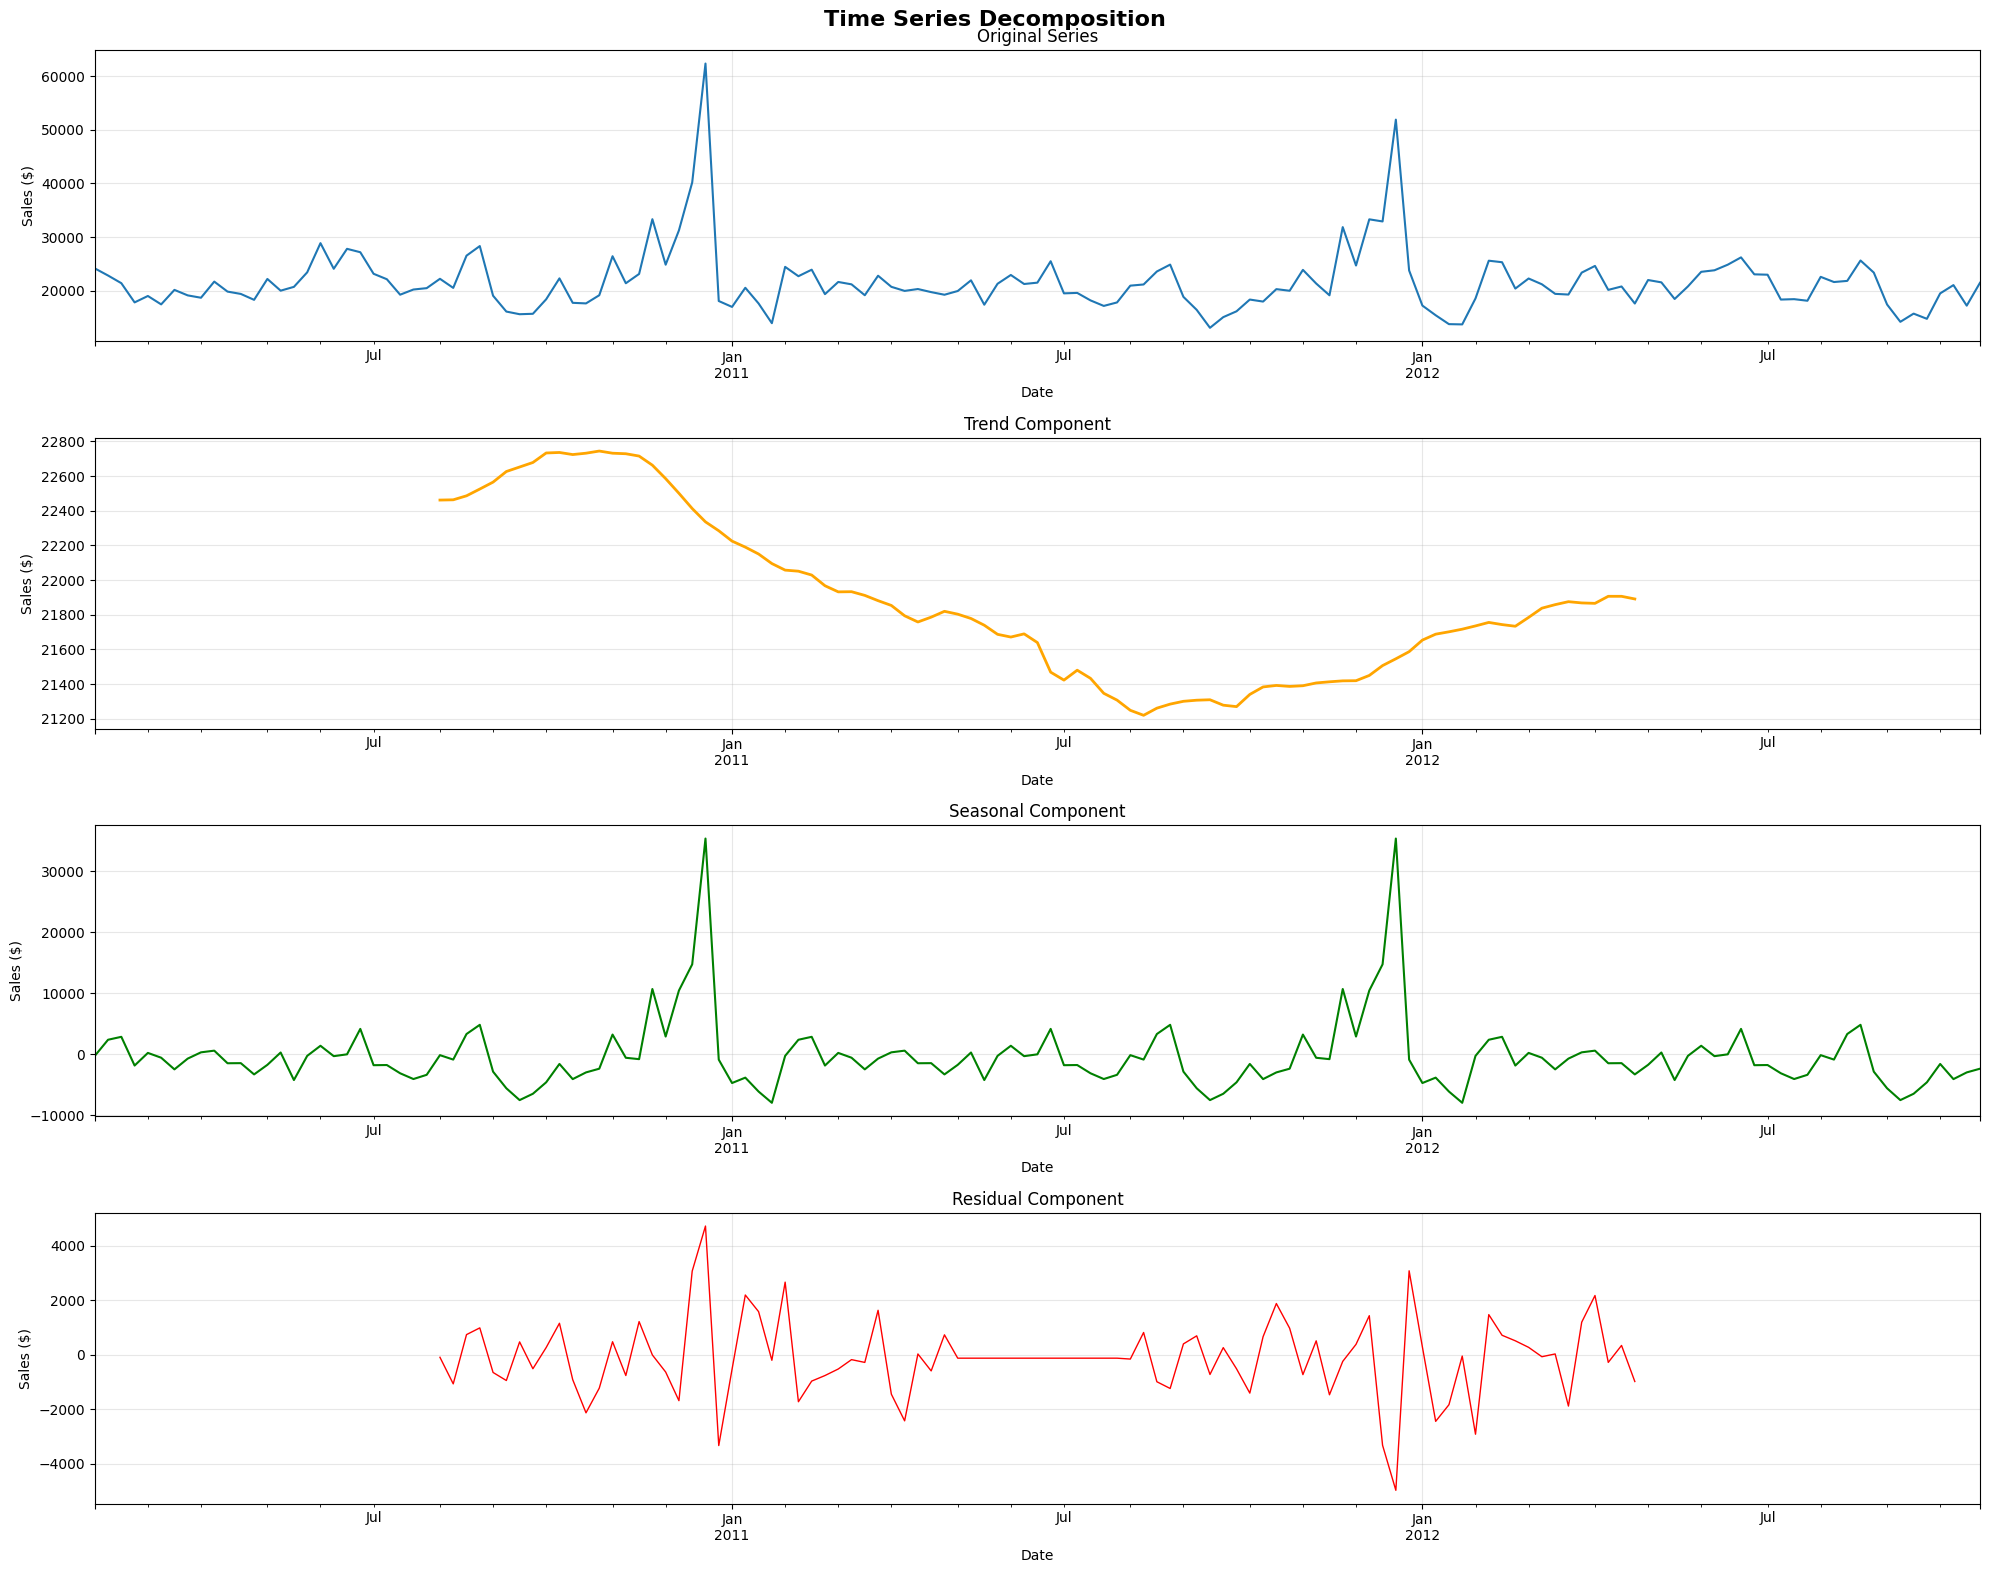

In [ ]:
decomposition = seasonal_decompose(df['Weekly_Sales'], model='additive', period=52)

fig, axes = plt.subplots(4, 1, figsize=(20, 16))
fig.suptitle('Time Series Decomposition', fontsize=16, fontweight='bold')

decomposition.observed.plot(ax=axes[0], title='Original Series', linewidth=1.5)
decomposition.trend.plot(ax=axes[1], title='Trend Component', color='orange', linewidth=2)
decomposition.seasonal.plot(ax=axes[2], title='Seasonal Component', color='green', linewidth=1.5)
decomposition.resid.plot(ax=axes[3], title='Residual Component', color='red', linewidth=1)

for ax in axes:
    ax.grid(True, alpha=0.3)
    ax.set_ylabel('Sales ($)')

plt.tight_layout()
plt.show()

## ACF/PACF Analysis

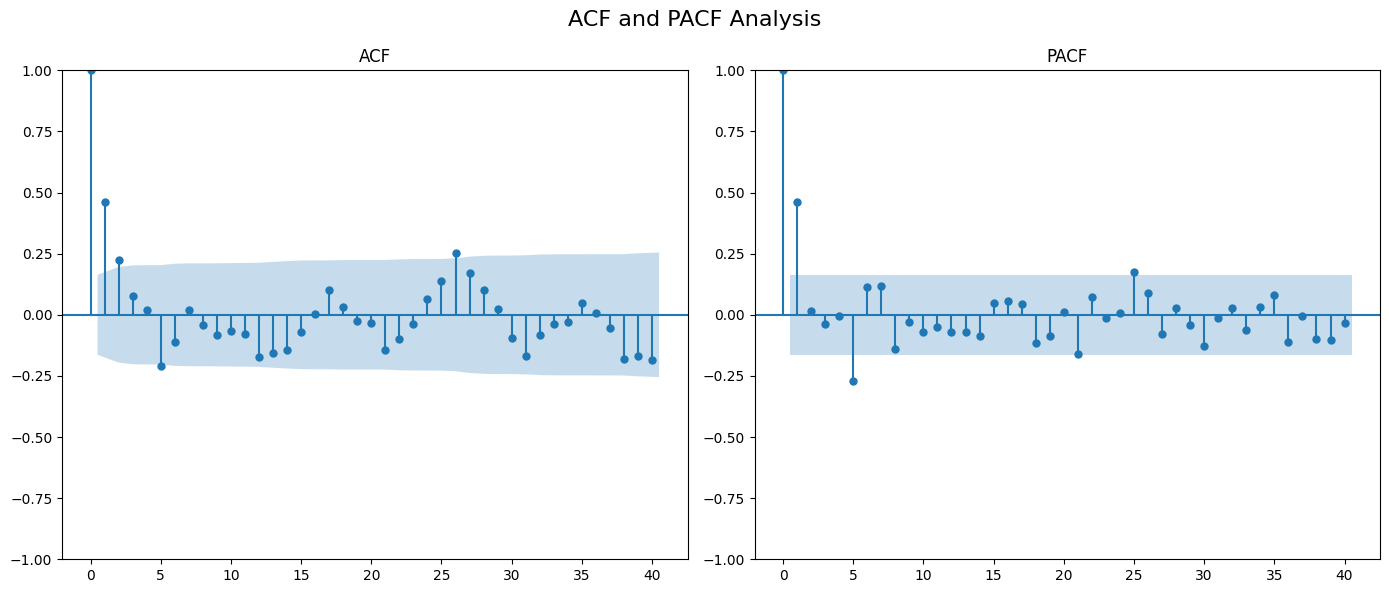

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('ACF and PACF Analysis', fontsize=16)
plot_acf(df['Weekly_Sales'].dropna(), ax=axes[0], lags=40, title='ACF')
plot_pacf(df['Weekly_Sales'].dropna(), ax=axes[1], lags=40, title='PACF')
plt.tight_layout()
plt.show()

## Stationarity Test

In [ ]:
adf_result = adfuller(df['Weekly_Sales'].dropna())
print(f"p-value: {adf_result[1]:.6f}")
if adf_result[1] <= 0.05:
    print("Series is stationary")
else:
    print("Series is non-stationary")

p-value: 0.000000
Series is stationary


# Split Dataset

In [ ]:
# Split data into train and test sets
period = 13 # Forecast 13 Weeks
train_data = df.iloc[:-period]
test_data = df.iloc[-period:]

print(f"Train data: {len(train_data)} samples")
print(f"Test data: {len(test_data)} samples")
print(f"Train period: {train_data.index.min()} to {train_data.index.max()}")
print(f"Test period: {test_data.index.min()} to {test_data.index.max()}")

Train data: 130 samples
Test data: 13 samples
Train period: 2010-02-05 00:00:00 to 2012-07-27 00:00:00
Test period: 2012-08-03 00:00:00 to 2012-10-26 00:00:00


In [ ]:
# Initialize dictionaries to store predictions
predictions = {}
metrics = {}

In [ ]:
train_data.to_csv('train_data.csv', index=False)
test_data.to_csv('test_data.csv', index=False)

# Exponential Smoothing Family Models

## Simple Exponential Smoothing

In [ ]:
simple_es = ExponentialSmoothing(train_data['Weekly_Sales'],
                               trend=None, seasonal=None).fit()
predictions['Simple_ES'] = simple_es.forecast(len(test_data))

## Holt's Linear Trend (Double Exponential Smoothing)

In [ ]:
holt_linear = ExponentialSmoothing(train_data['Weekly_Sales'],
                                 trend='add', seasonal=None).fit()
predictions['Holt_Linear'] =  holt_linear.forecast(len(test_data))

## Holt-Winters (Triple Exponential Smoothing)

In [ ]:
holt_winters = ExponentialSmoothing(train_data['Weekly_Sales'],
                                    trend='add', seasonal='add',
                                    seasonal_periods=52).fit()
predictions['Holt_Winters'] = holt_winters.forecast(len(test_data))

# ARIMA Family Models

## ARIMA

In [ ]:
arima_model = ARIMA(train_data['Weekly_Sales'], order=(1, 1, 1)).fit()
predictions['ARIMA'] = arima_model.forecast(len(test_data))

## SARIMA

In [ ]:
sarima_model = SARIMAX(train_data['Weekly_Sales'],
                       order=(1, 1, 1),
                       seasonal_order=(1, 1, 1, 52)).fit()
predictions['SARIMA'] = sarima_model.forecast(len(test_data))

## SARIMAX

In [ ]:
exog_cols = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'IsHoliday']
sarimax_model = SARIMAX(train_data['Weekly_Sales'],
                        exog=train_data[exog_cols],
                        order=(1, 1, 1),
                        seasonal_order=(1, 1, 1, 52)).fit()
predictions['SARIMAX'] = sarimax_model.forecast(len(test_data),
                                               exog=test_data[exog_cols])

# Machine Learning Models

In [ ]:
X_train = train_data.drop(columns=['Weekly_Sales'])
y_train = train_data['Weekly_Sales']
X_test = test_data.drop(columns=['Weekly_Sales'])
y_test = test_data['Weekly_Sales']

In [ ]:
scaler_ml = StandardScaler()
X_train_scaled = scaler_ml.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = scaler_ml.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

In [ ]:
joblib.dump(scaler_ml, 'scaler_ml.pkl')

['scaler_ml.pkl']

In [ ]:
def ml_random_search(model, param_dist, X_train, y_train):
    random_search = RandomizedSearchCV(model,
                                       param_distributions=param_dist,
                                       n_iter=10,
                                       cv=5,
                                       scoring='neg_mean_squared_error',
                                       n_jobs=-1,
                                       verbose=1)
    random_search.fit(X_train, y_train)
    print(f"Best parameters: {random_search.best_params_}")
    print(f"Best score: {-random_search.best_score_}")
    return random_search.best_estimator_

## Random Forest

In [ ]:
rf_model = RandomForestRegressor(random_state=42, n_jobs=-1)
rf_param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_best_model = ml_random_search(rf_model, rf_param_dist, X_train_scaled, y_train)
predictions['Random_Forest'] = rf_best_model.predict(X_test_scaled)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 10}
Best score: 43711063.32183881


## XGBoost

In [ ]:
xgb_model = xgb.XGBRegressor(random_state=42, n_jobs=-1)
xgb_param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2]
}

xgb_best_model = ml_random_search(xgb_model, xgb_param_dist, X_train_scaled, y_train)
predictions['XGBoost'] = xgb_best_model.predict(X_test_scaled)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters: {'subsample': 0.8, 'n_estimators': 100, 'max_depth': 7, 'learning_rate': 0.01, 'gamma': 0.1, 'colsample_bytree': 0.9}
Best score: 43324366.34009255


## Gradient Boosting

In [ ]:
gb_model = GradientBoostingRegressor(random_state=42)
gb_param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

gb_best_model = ml_random_search(gb_model, gb_param_dist, X_train_scaled, y_train)
predictions['Gradient_Boosting'] = gb_best_model.predict(X_test_scaled)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 5, 'learning_rate': 0.01}
Best score: 42508584.53795179


## Feature Importance

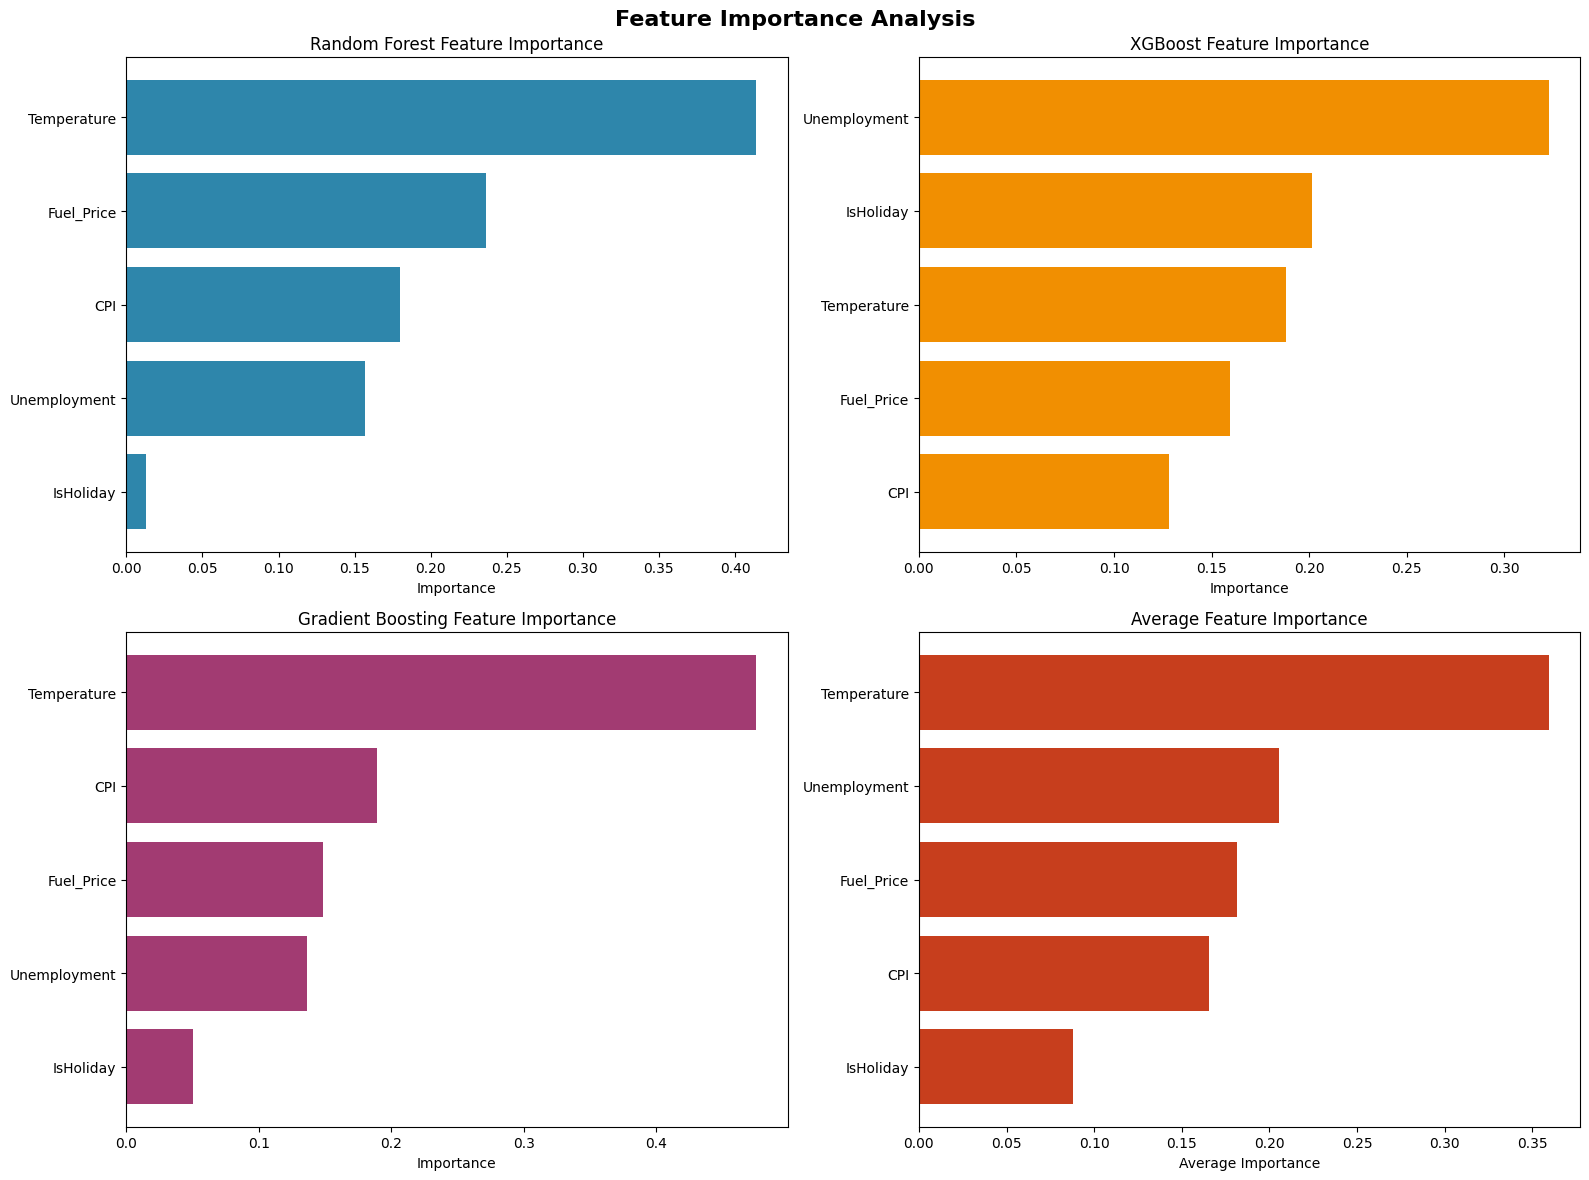

In [ ]:
def plot_feature_importance(rf_model, xgb_model, gb_model, X_train):
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('Feature Importance Analysis', fontsize=16, fontweight='bold')

    models = {
        'Random Forest': (rf_model.feature_importances_, axes[0, 0], '#2E86AB'),
        'XGBoost': (xgb_model.feature_importances_, axes[0, 1], '#F18F01'),
        'Gradient Boosting': (gb_model.feature_importances_, axes[1, 0], '#A23B72')
    }

    for i, (title, (importances, ax, color)) in enumerate(models.items()):
        data = pd.DataFrame({'feature': X_train.columns, 'importance': importances}).sort_values('importance')
        ax.barh(data['feature'], data['importance'], color=color)
        ax.set_title(f'{title} Feature Importance')
        ax.set_xlabel('Importance')

    avg_importance = pd.DataFrame({
        'feature': X_train.columns,
        'rf': rf_model.feature_importances_,
        'xgb': xgb_model.feature_importances_,
        'gb': gb_model.feature_importances_
    })
    avg_importance['avg'] = avg_importance[['rf', 'xgb', 'gb']].mean(axis=1)
    avg_importance.sort_values('avg', inplace=True)

    axes[1, 1].barh(avg_importance['feature'], avg_importance['avg'], color='#C73E1D')
    axes[1, 1].set_title('Average Feature Importance')
    axes[1, 1].set_xlabel('Average Importance')

    plt.tight_layout()
    plt.show()

plot_feature_importance(rf_best_model, xgb_best_model, gb_best_model, X_train_scaled)

# Deep Learning Models

In [ ]:
# Scale the data
scaler_dl = StandardScaler()
scaled_data = scaler_dl.fit_transform(df[['Weekly_Sales']])

In [ ]:
# Parameters
lookback = 13
val_weeks = 13
test_weeks = 13

In [ ]:
# Create sequences
X_dl, y_dl = [], []
for i in range(lookback, len(scaled_data)):
    X_dl.append(scaled_data[i-lookback:i, 0])
    y_dl.append(scaled_data[i, 0])

X_dl, y_dl = np.array(X_dl), np.array(y_dl)

In [ ]:
# Define split points
total_samples = len(X_dl)
test_start = total_samples - test_weeks
val_start = test_start - val_weeks

In [ ]:
# Split the data
X_train_dl = X_dl[:val_start]
y_train_dl = y_dl[:val_start]

X_val_dl = X_dl[val_start:test_start]
y_val_dl = y_dl[val_start:test_start]

X_test_dl = X_dl[test_start:]
y_test_dl = y_dl[test_start:]

In [ ]:
# Reshape for RNN/CNN
X_train_rnn = X_train_dl.reshape((X_train_dl.shape[0], X_train_dl.shape[1], 1))
X_val_rnn = X_val_dl.reshape((X_val_dl.shape[0], X_val_dl.shape[1], 1))
X_test_rnn = X_test_dl.reshape((X_test_dl.shape[0], X_test_dl.shape[1], 1))

In [ ]:
joblib.dump(scaler_dl, 'scaler_dl.pkl')

['scaler_dl.pkl']

## Artificial Neural Network (ANN)

In [ ]:
ann_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_dl.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

In [ ]:
ann_model.compile(optimizer="adam", loss='mse', metrics=['mse'])
ann_model.fit(X_train_dl, y_train_dl, epochs=100, batch_size=8, validation_data=(X_val_dl, y_val_dl))

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 1.0914 - mse: 1.0914 - val_loss: 0.2040 - val_mse: 0.2040
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.5755 - mse: 1.5755 - val_loss: 0.1882 - val_mse: 0.1882
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.9046 - mse: 0.9046 - val_loss: 0.1794 - val_mse: 0.1794
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.8641 - mse: 0.8641 - val_loss: 0.1732 - val_mse: 0.1732
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.7390 - mse: 0.7390 - val_loss: 0.1737 - val_mse: 0.1737
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.6481 - mse: 0.6481 - val_loss: 0.1752 - val_mse: 0.1752
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.4807 - mse: 0.4807 - val_loss: 0.1749 - val_mse: 0.1749
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.8497 - mse: 0.8497 - val_loss: 0.1889 - val_mse: 0.1889
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss

In [ ]:
ann_pred = ann_model.predict(X_test_dl)
predictions['ANN'] = scaler_dl.inverse_transform(ann_pred.reshape(-1, 1)).flatten()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


## RNN

In [ ]:
rnn_model = Sequential([
    SimpleRNN(50, return_sequences=True, input_shape=(X_train_rnn.shape[1], 1)),
    SimpleRNN(50, activation='relu'),
    Dense(25, activation='relu'),
    Dense(1)
])

In [ ]:
rnn_model.compile(optimizer="adam", loss='mse', metrics=['mse'])
rnn_model.fit(X_train_rnn, y_train_dl, epochs=100, batch_size=8, validation_data=(X_val_rnn, y_val_dl))

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - loss: 1.0878 - mse: 1.0878 - val_loss: 0.1859 - val_mse: 0.1859
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 1.1501 - mse: 1.1501 - val_loss: 0.1568 - val_mse: 0.1568
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1.0904 - mse: 1.0904 - val_loss: 0.1562 - val_mse: 0.1562
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.2590 - mse: 1.2590 - val_loss: 0.1819 - val_mse: 0.1819
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.5274 - mse: 0.5274 - val_loss: 0.1975 - val_mse: 0.1975
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.3399 - mse: 0.3399 - val_loss: 0.2395 - val_mse: 0.2395
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.3709 - mse: 0.3709 - val_loss: 0.2992 - val_mse: 0.2992
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.2317 - mse: 0.2317 - val_loss: 0.2983 - val_mse: 0.2983
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - lo

In [ ]:
rnn_pred = rnn_model.predict(X_test_rnn)
predictions['RNN'] = scaler_dl.inverse_transform(rnn_pred.reshape(-1, 1)).flatten()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step


## LSTM

In [ ]:
lstm_model = Sequential([
    Bidirectional(LSTM(50, return_sequences=True, input_shape=(X_train_rnn.shape[1], 1))),
    Bidirectional(LSTM(50, activation='relu')),
    Dense(1)
])

In [ ]:
lstm_model.compile(optimizer="adam", loss='mse', metrics=['mse'])
lstm_model.fit(X_train_rnn, y_train_dl, epochs=100, batch_size=8, validation_data=(X_val_rnn, y_val_dl))

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 93ms/step - loss: 0.8488 - mse: 0.8488 - val_loss: 0.1869 - val_mse: 0.1869
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.9636 - mse: 0.9636 - val_loss: 0.1895 - val_mse: 0.1895
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.7610 - mse: 0.7610 - val_loss: 0.1947 - val_mse: 0.1947
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 1.2883 - mse: 1.2883 - val_loss: 0.2293 - val_mse: 0.2293
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.7120 - mse: 0.7120 - val_loss: 0.2203 - val_mse: 0.2203
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 1.1436 - mse: 1.1436 - val_loss: 0.2329 - val_mse: 0.2329
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 1.1519 - mse: 1.1519 - val_loss: 0.2368 - val_mse: 0.2368
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.8841 - mse: 0.8841 - val_loss: 0.2322 - val_mse: 0.2322
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - lo

In [ ]:
lstm_pred = lstm_model.predict(X_test_rnn)
predictions['LSTM'] = scaler_dl.inverse_transform(lstm_pred.reshape(-1, 1)).flatten()

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


## GRU

In [ ]:
gru_model = Sequential([
    GRU(50, return_sequences=True, input_shape=(X_train_rnn.shape[1], 1)),
    GRU(50, activation='relu'),
    Dense(1)
])

In [ ]:
gru_model.compile(optimizer="adam", loss='mse', metrics=['mse'])
gru_model.fit(X_train_rnn, y_train_dl, epochs=100, batch_size=8, validation_data=(X_val_rnn, y_val_dl))

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 68ms/step - loss: 2.0052 - mse: 2.0052 - val_loss: 0.1777 - val_mse: 0.1777
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.6706 - mse: 0.6706 - val_loss: 0.1649 - val_mse: 0.1649
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1.3039 - mse: 1.3039 - val_loss: 0.1549 - val_mse: 0.1549
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1.2514 - mse: 1.2514 - val_loss: 0.1444 - val_mse: 0.1444
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1.7715 - mse: 1.7715 - val_loss: 0.1310 - val_mse: 0.1310
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.8357 - mse: 0.8357 - val_loss: 0.1256 - val_mse: 0.1256
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.6273 - mse: 0.6273 - val_loss: 0.1260 - val_mse: 0.1260
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.5431 - mse: 0.5431 - val_loss: 0.1339 - val_mse: 0.1339
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - lo

In [ ]:
gru_pred = gru_model.predict(X_test_rnn)
predictions['GRU'] = scaler_dl.inverse_transform(gru_pred.reshape(-1, 1)).flatten()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step


## CNN

In [ ]:
cnn_model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_dl.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=32, kernel_size=3, activation='relu'),
    Flatten(),
    Dense(25, activation='relu'),
    Dense(1)
])

In [ ]:
cnn_model.compile(optimizer="adam", loss='mse', metrics=['mse'])
cnn_model.fit(X_train_rnn, y_train_dl, epochs=100, batch_size=8, validation_data=(X_val_rnn, y_val_dl))

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 2.1812 - mse: 2.1812 - val_loss: 0.1861 - val_mse: 0.1861
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.6968 - mse: 0.6968 - val_loss: 0.1784 - val_mse: 0.1784
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 2.2819 - mse: 2.2819 - val_loss: 0.1885 - val_mse: 0.1885
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.8382 - mse: 0.8382 - val_loss: 0.1903 - val_mse: 0.1903
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.9417 - mse: 0.9417 - val_loss: 0.2069 - val_mse: 0.2069
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.2739 - mse: 1.2739 - val_loss: 0.2235 - val_mse: 0.2235
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.4788 - mse: 0.4788 - val_loss: 0.2078 - val_mse: 0.2078
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.9477 - mse: 0.9477 - val_loss: 0.2391 - val_mse: 0.2391
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss:

In [ ]:
cnn_pred = cnn_model.predict(X_test_rnn)
predictions['CNN'] = scaler_dl.inverse_transform(cnn_pred.reshape(-1, 1)).flatten()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


# Prophet

In [ ]:
prophet_train = train_data.reset_index()
prophet_train.columns = ['ds', 'IsHoliday', 'y', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

prophet_test = test_data.reset_index()
prophet_test.columns = ['ds', 'IsHoliday', 'y', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

In [ ]:
holidays = prophet_train[prophet_train['IsHoliday'] == 1][['ds']].copy()
holidays['holiday'] = 'walmart_holiday'
holidays['lower_window'] = 0
holidays['upper_window'] = 0

In [ ]:
prophet_model = Prophet(
    holidays=holidays,
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False,
    seasonality_mode='additive'
)

regressor_cols = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
for col in regressor_cols:
    prophet_model.add_regressor(col)

prophet_model.fit(prophet_train[['ds', 'y'] + regressor_cols])

DEBUG:cmdstanpy:input tempfile: /tmp/tmp48av6t1n/_mq2bjyb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp48av6t1n/1djb2ave.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=786', 'data', 'file=/tmp/tmp48av6t1n/_mq2bjyb.json', 'init=/tmp/tmp48av6t1n/1djb2ave.json', 'output', 'file=/tmp/tmp48av6t1n/prophet_model13o_k6i3/prophet_model-20250628082936.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:29:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:29:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future_df = prophet_train[['ds'] + regressor_cols].copy()
future_df = pd.concat([
    future_df,
    prophet_test[['ds'] + regressor_cols]
], ignore_index=True)

In [ ]:
profit_pred = prophet_model.predict(future_df)
predictions['Prophet'] = profit_pred.tail(len(test_data))['yhat'].values

# N-BEATS

In [ ]:
df_nbeats = df.reset_index().copy()
df_nbeats['unique_id'] = 'store_23'
df_nbeats.rename(columns={'Date': 'ds', 'Weekly_Sales': 'y'}, inplace=True)

In [ ]:
exog_cols = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'IsHoliday']
scaler_nbeats = StandardScaler()
df_nbeats[exog_cols] = scaler_nbeats.fit_transform(df_nbeats[exog_cols])

In [ ]:
df_nbeats = df_nbeats[['unique_id', 'ds', 'y'] + exog_cols]
horizon = len(test_data)

In [ ]:
nbeats_model = NeuralForecast(
    models=[
        NBEATSx(
            input_size= 9 * horizon,
            h=horizon,
            max_steps=100,
            val_check_steps=10,
            scaler_type='robust',
            loss=MSE(),
            futr_exog_list=exog_cols,
            batch_size=8
        )
    ],
    freq='W'
)
nbeats_model.fit(df_nbeats, val_size=horizon)

In [ ]:
futr_df = nbeats_model.make_future_dataframe()

future_exog = test_data.reset_index().copy()
future_exog['unique_id'] = 'store_23'
future_exog.rename(columns={'Date': 'ds'}, inplace=True)
future_exog[exog_cols] = scaler_nbeats.transform(future_exog[exog_cols])
future_exog = future_exog[['unique_id', 'ds'] + exog_cols]

futr_df = futr_df.merge(future_exog, on=['unique_id', 'ds'], how='left')

In [ ]:
missing = futr_df[exog_cols].isna().sum()
if missing.any():
    futr_df[exog_cols] = futr_df[exog_cols].fillna(method='ffill').fillna(0)

In [ ]:
forecast_nbeats = nbeats_model.predict(futr_df=futr_df)
predictions['NBEATS'] = forecast_nbeats['NBEATSx'].values

In [ ]:
joblib.dump(scaler_nbeats, 'scaler_nbeats.pkl')

['scaler_nbeats.pkl']

# Evaluation & Comparison

In [ ]:
def evaluate_models(predictions, test_series):

    results = {}
    for model_name, pred in predictions.items():
        actual = test_series.values[:len(pred)]
        rmse = np.sqrt(mean_squared_error(actual, pred))
        mae = mean_absolute_error(actual, pred)
        mape = mean_absolute_percentage_error(actual, pred) * 100
        results[model_name] = {'RMSE': rmse, 'MAE': mae, 'MAPE': mape}
    return pd.DataFrame(results).T.sort_values('RMSE')

metrics_df = evaluate_models(predictions, test_data['Weekly_Sales'])
print("Model Performance Metrics:")
print(metrics_df.round(2))

Model Performance Metrics:
                      RMSE      MAE   MAPE
ANN                1785.41  1482.00   8.13
SARIMA             1914.88  1528.89   7.73
RNN                2022.47  1698.32   9.33
LSTM               2176.80  1707.02   9.00
GRU                2328.26  2014.04  10.59
Prophet            2368.84  1895.42  10.38
Holt_Winters       2481.08  2053.63  10.40
CNN                2498.99  2153.77  11.75
SARIMAX            2848.43  2217.56  11.19
XGBoost            3533.39  2755.72  15.97
Simple_ES          3543.49  3180.68  16.42
Gradient_Boosting  3618.56  2841.44  16.17
Random_Forest      3684.84  2844.74  16.71
ARIMA              3945.98  3170.46  18.42
NBEATS             4100.98  3389.53  19.34
Holt_Linear        4825.21  4059.71  19.11


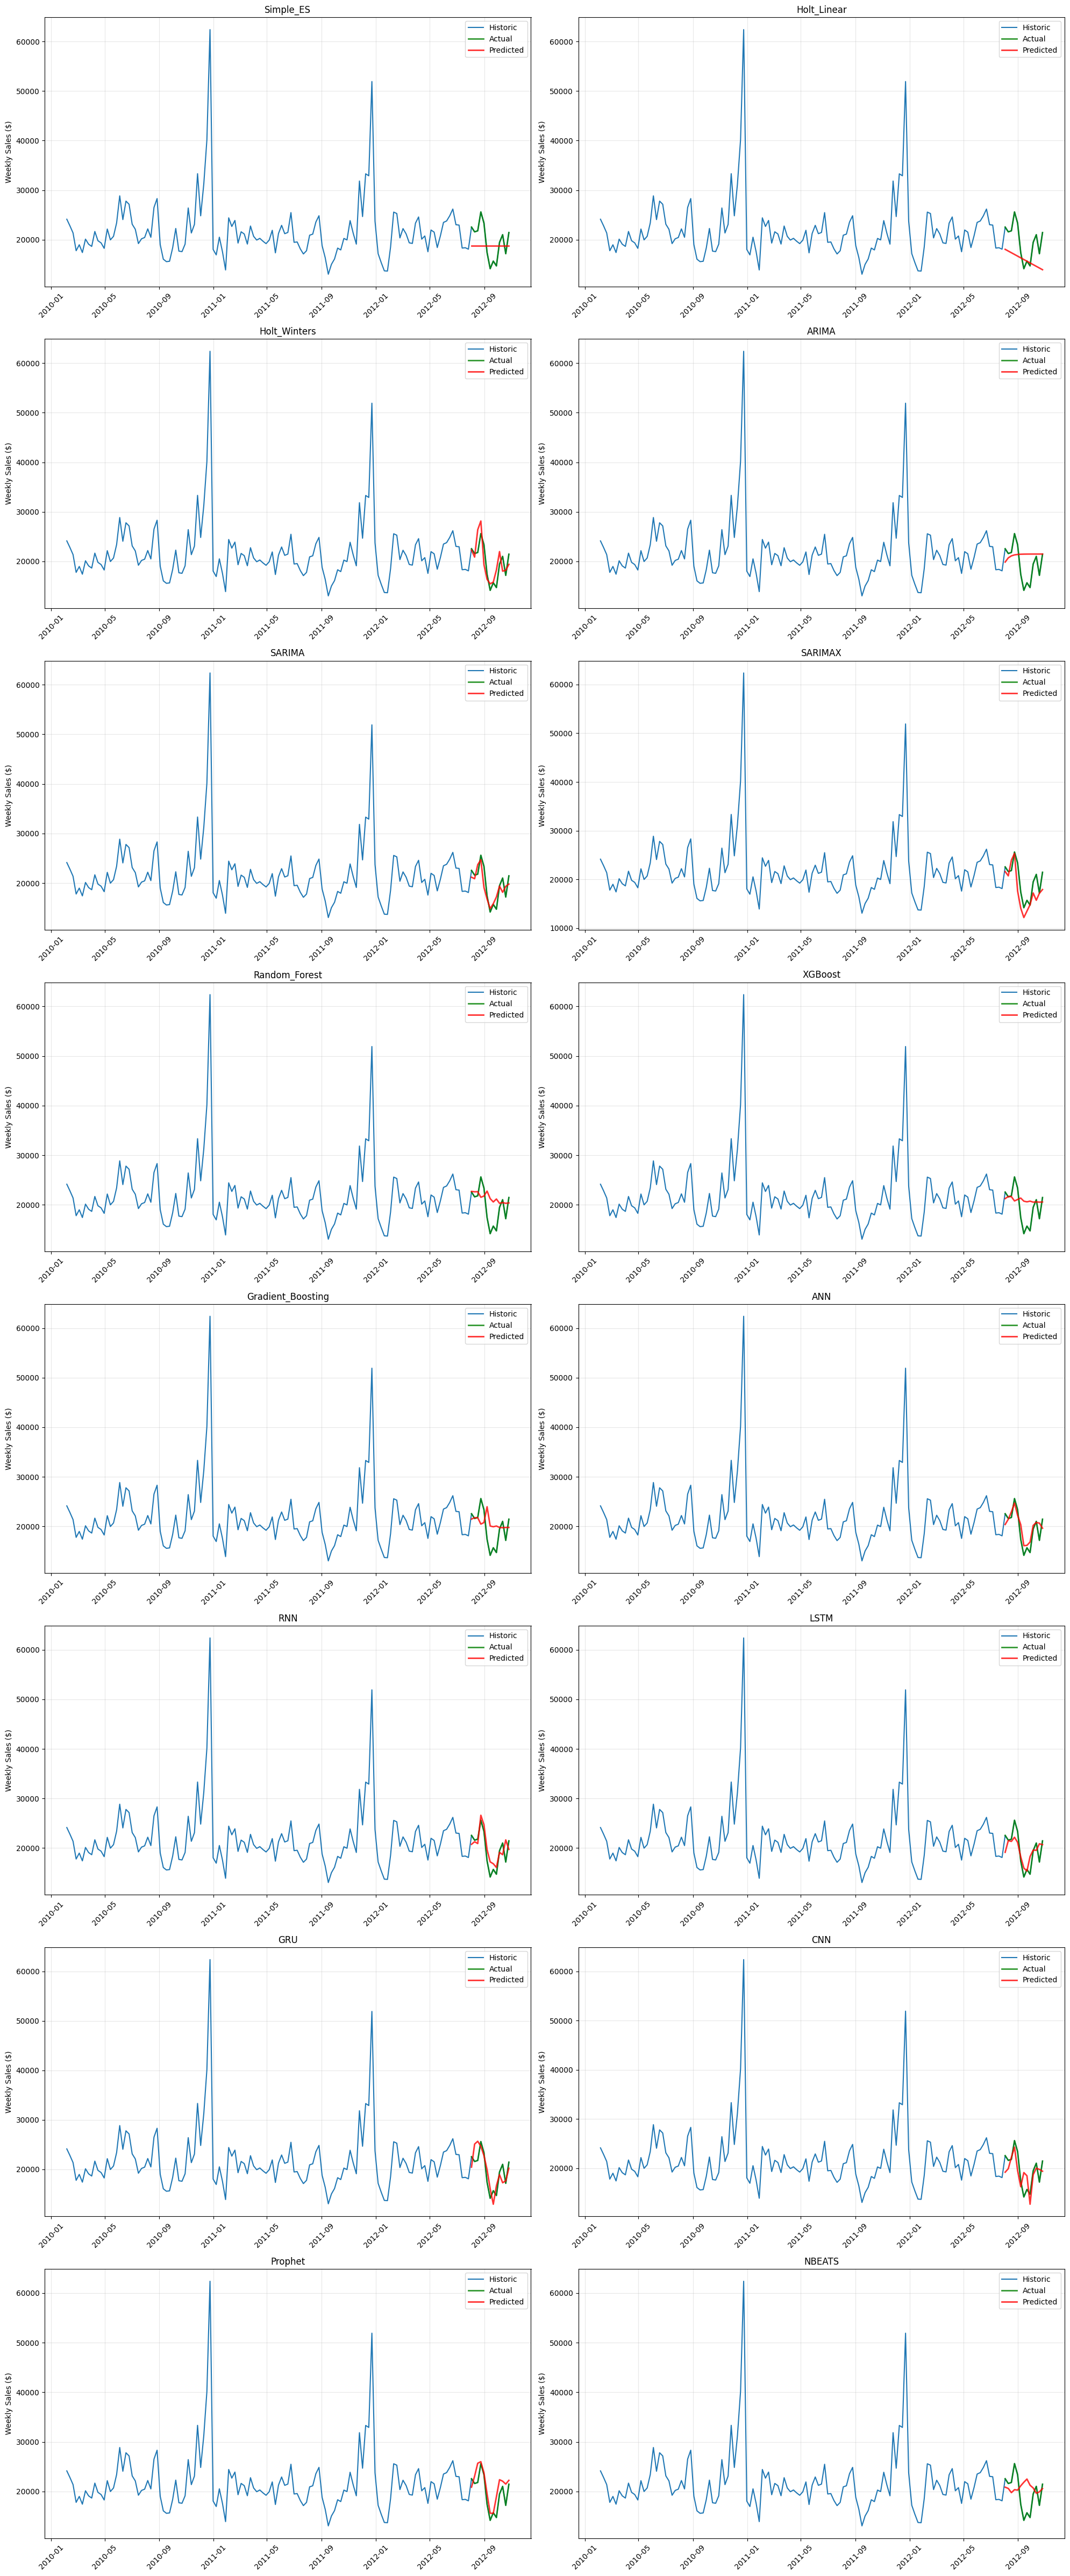

In [ ]:
def plot_individual_predictions(predictions, train_data, test_data, metrics_df):

    n_models = len(predictions)
    n_cols = 2
    n_rows = (n_models + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 6 * n_rows))
    if n_rows == 1:
        axes = [axes] if n_models == 1 else axes
    else:
        axes = axes.flatten()

    for idx, (model_name, pred) in enumerate(predictions.items()):
        ax = axes[idx]
        pred_index = test_data.index[:len(pred)]

        full_actual_index = train_data.index.append(test_data.index)
        full_actual_values = np.concatenate([train_data['Weekly_Sales'].values, test_data['Weekly_Sales'].values])

        ax.plot(full_actual_index, full_actual_values,
               label='Historic', linewidth=1.5)

        ax.plot(test_data.index, test_data['Weekly_Sales'],
               label='Actual', color='green', linewidth=2, alpha=0.8)

        ax.plot(pred_index, pred,
               label='Predicted', color='red', linewidth=2, alpha=0.8)

        ax.set_title(f'{model_name}', fontsize=12)
        ax.set_ylabel('Weekly Sales ($)')
        ax.legend()
        ax.grid(True, alpha=0.3)
        ax.tick_params(axis='x', rotation=45)

    for idx in range(n_models, len(axes)):
        axes[idx].set_visible(False)

    plt.tight_layout()
    plt.show()

plot_individual_predictions(predictions, train_data, test_data, metrics_df)

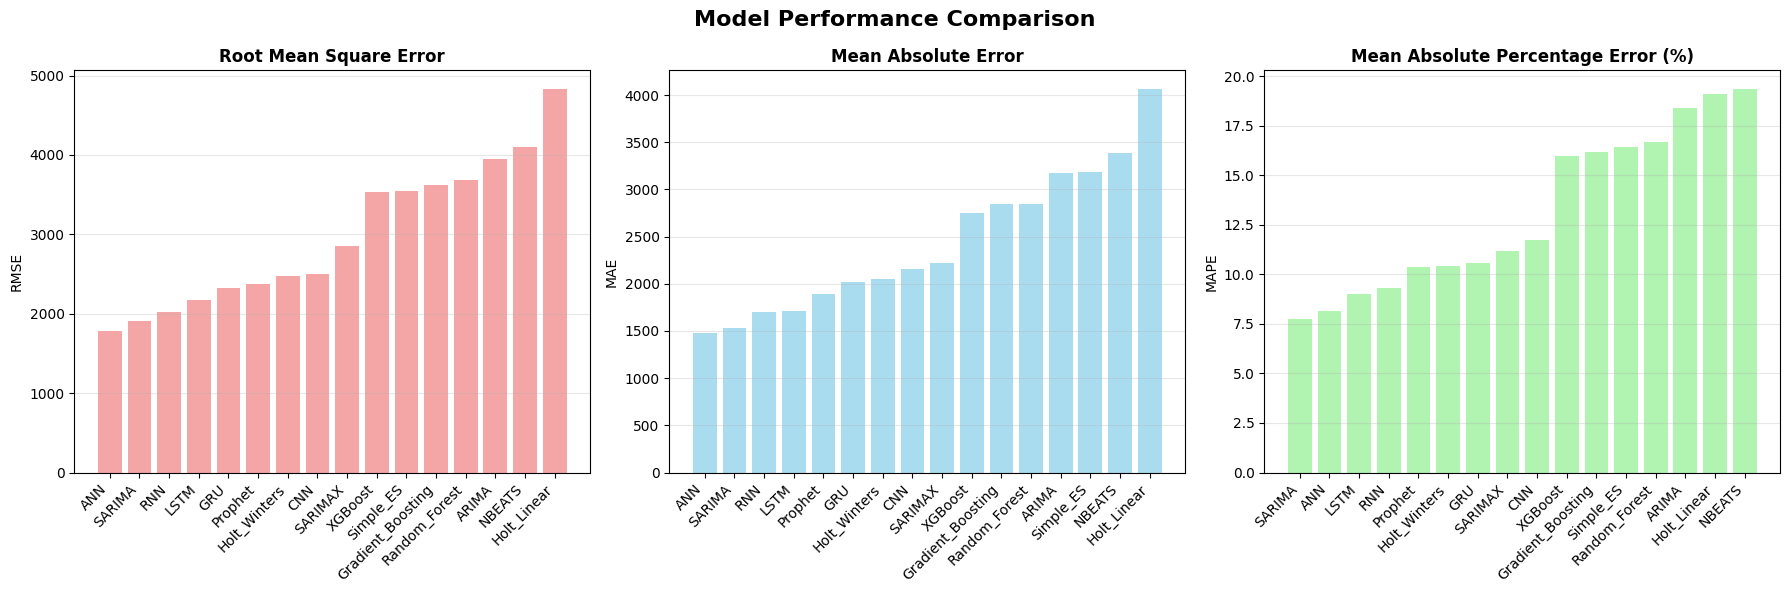

In [ ]:
def plot_ordered_metrics(metrics_df):

    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    fig.suptitle('Model Performance Comparison', fontsize=16, fontweight='bold')

    metrics_info = [
        ('RMSE', 'Root Mean Square Error', 'lightcoral'),
        ('MAE', 'Mean Absolute Error', 'skyblue'),
        ('MAPE', 'Mean Absolute Percentage Error (%)', 'lightgreen')
    ]

    for i, (metric, title, color) in enumerate(metrics_info):
        ax = axes[i]

        sorted_data = metrics_df[metric].sort_values(ascending=True)
        bars = ax.bar(range(len(sorted_data)), sorted_data.values, color=color, alpha=0.7)
        ax.set_title(title, fontsize=12, fontweight='bold')
        ax.set_ylabel(metric)
        ax.set_xticks(range(len(sorted_data)))
        ax.set_xticklabels(sorted_data.index, rotation=45, ha='right')

        ax.grid(True, alpha=0.3, axis='y')

    plt.tight_layout()
    plt.show()

plot_ordered_metrics(metrics_df)

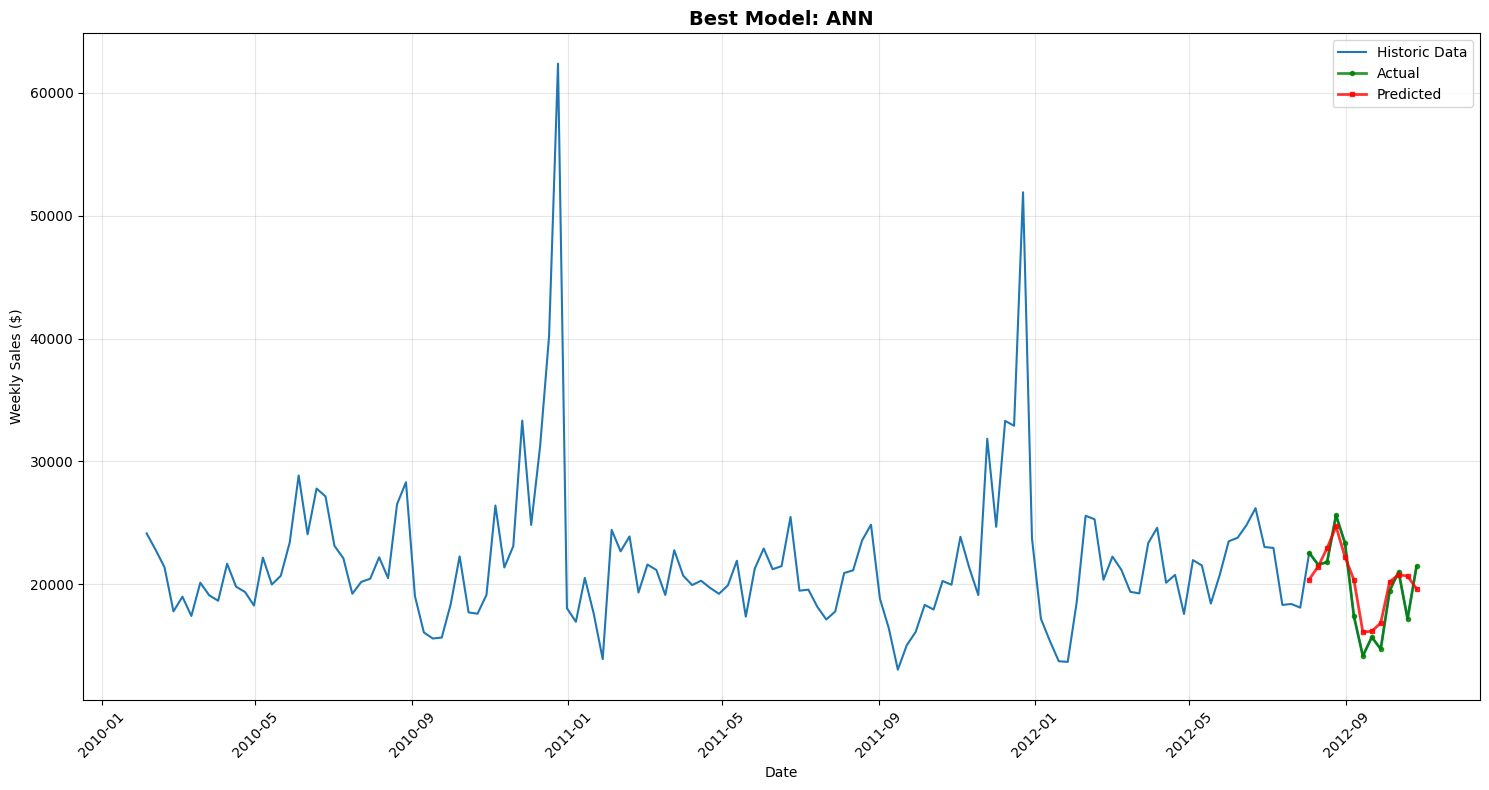


BEST PERFORMING MODEL: ANN
RMSE: 1785.4057
MAE: 1481.9964
MAPE: 8.1311


In [ ]:
def plot_best_model_detailed(train_data, test_data, predictions, metrics_df):

    best_model = metrics_df.index[0]
    best_pred = predictions[best_model]
    plt.figure(figsize=(15, 8))

    pred_index = test_data.index[:len(best_pred)]

    full_actual_index = train_data.index.append(test_data.index)
    full_actual_values = np.concatenate([train_data['Weekly_Sales'].values, test_data['Weekly_Sales'].values])

    plt.plot(full_actual_index, full_actual_values,
             label='Historic Data', linewidth=1.5)

    plt.plot(test_data.index, test_data['Weekly_Sales'],
             label='Actual', color='green', linewidth=2, marker='o', markersize=3, alpha=0.8)

    plt.plot(pred_index, best_pred,
             label=f'Predicted', color='red', linewidth=2,
             marker='s', markersize=3, alpha=0.8)

    plt.title(f'Best Model: {best_model}',
              fontsize=14, fontweight='bold')
    plt.xlabel('Date')
    plt.ylabel('Weekly Sales ($)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    print(f"\n{'='*50}")
    print(f"BEST PERFORMING MODEL: {best_model}")
    print(f"{'='*50}")
    for metric in metrics_df.columns:
        value = metrics_df.loc[best_model, metric]
        print(f"{metric}: {value:.4f}")
    print(f"{'='*50}")

plot_best_model_detailed(train_data, test_data, predictions, metrics_df)

# Save Best Model

In [ ]:
metrics = {}

for name, pred in predictions.items():
    metrics[name] = np.sqrt(mean_squared_error(y_test, pred))

best_model_name = min(metrics, key=metrics.get)
print(f"Best model: {best_model_name}\nRMSE: {metrics[best_model_name]:.2f}")

pkl_models = {
    'Prophet': prophet_model,
    'Random_Forest': rf_best_model,
    'XGBoost': xgb_best_model,
    'Gradient_Boosting': gb_best_model,
    'Simple_ES': simple_es,
    'Holt_Linear': holt_linear,
    'Holt_Winters': holt_winters,
    'ARIMA': arima_model,
    'SARIMA': sarima_model,
    'SARIMAX': sarimax_model
}

h5_models = {
    'ANN': ann_model,
    'RNN': rnn_model,
    'LSTM': lstm_model,
    'GRU': gru_model,
    'CNN': cnn_model
}

neuralforecast_models = {
    'NBEATSx': nbeats_model
}

if best_model_name in pkl_models:
    with open("model.pkl", "wb") as f:
        pickle.dump(pkl_models[best_model_name], f)
    print("Model saved as model.pkl")

elif best_model_name in h5_models:
    h5_models[best_model_name].save("model.h5")
    print("Model saved as model.h5")

elif best_model_name in neuralforecast_models:
    neuralforecast_models[best_model_name].save(path='model_nbeatsx')
    print("Model saved in folder: model_nbeatsx")

else:
    print("Could not identify model for saving.")

Best model: ANN
RMSE: 1785.41
Model saved as model.h5
